[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 5.20

Topics: Gaussian random vectors

Author: Carlos Fernandez-Granda

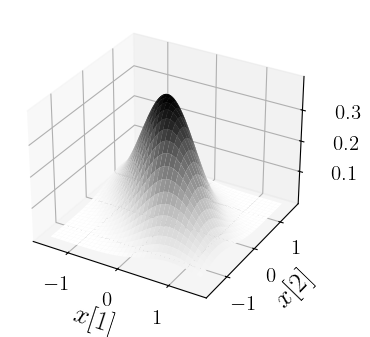

In [3]:
import os.path
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import Axes3D

font_size = 20
font_size_ticks = 15

x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
invsq2 = 1 / np.sqrt(2)
U = np.array([[invsq2,invsq2],[invsq2,-invsq2]])
eigs = np.array([0.2,0.8])
D = np.diag(eigs)
Sigma = U @ D @ U.T
invSigma = np.linalg.inv(Sigma)

def gaussian(x,y):
    return (np.exp(-(invSigma[0,0] * x**2 + 2*invSigma[0,1]*x*y + invSigma[1,1] * y**2)/2)
                  /(2 * np.pi * np.sqrt(np.linalg.det(Sigma))))

X, Y = np.meshgrid(x, y)
Z = gaussian(X, Y)
c1=np.exp(-1/2)/(2 * np.pi * np.sqrt(np.linalg.det(Sigma)))
level_list = [c1]
level_list_2 = [1e-10,1e-7,1e-4,1e-2,1e-1,0.37]

fig = plt.figure(figsize = (4,4)) 
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap='Greys',rasterized=True)#,vmin=0, vmax=0.08)
plt.xticks([-1,0,1],fontsize=font_size_ticks) 
plt.yticks([-1,0,1],fontsize=font_size_ticks)
ax.zaxis.set_tick_params(labelsize=font_size_ticks,pad=12)
plt.ylabel(r'$x[2]$',fontsize=font_size,labelpad = 5)
plt.xlabel(r'$x[1]$',fontsize=font_size,labelpad = 5)
plt.show()

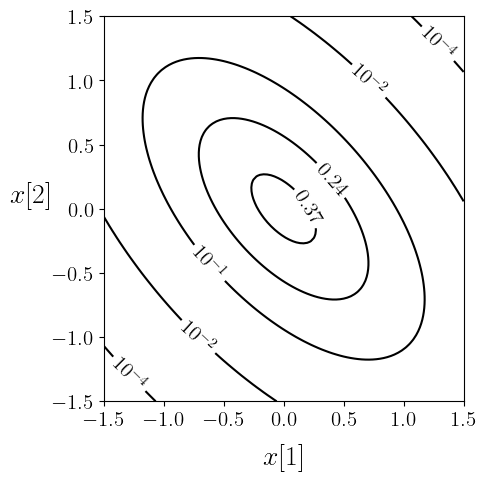

In [4]:
fig = plt.figure(figsize = (5,5)) 
CS = plt.contour(X, Y, Z, levels = level_list,colors='black')#levels=30,cmap='RdGy',alpha=1);
fmt = {}
fmt[level_list[0]] = r'$0.24$'
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt=fmt)#,ticks=Contourrange)
CS2 = plt.contour(X, Y, Z, levels = level_list_2,colors='black')#levels=30,cmap='RdGy',alpha=1);
fmt2 = {}
strs = [r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$',r'$0.37$']
for l, s in zip(CS2.levels, strs):
    fmt2[l] = s
plt.clabel(CS2, fontsize=font_size_ticks, inline=1,fmt=fmt2)# ['$10^{-10}$','$10^{-7}$','$10^{-5}$'])#,ticks=Contourrange)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel(r"$x[1]$", fontsize=font_size,labelpad=10)
h = plt.ylabel(r"$x[2]$", fontsize=font_size,labelpad=15)
h.set_rotation(0)
plt.gcf().subplots_adjust(left=0.18)

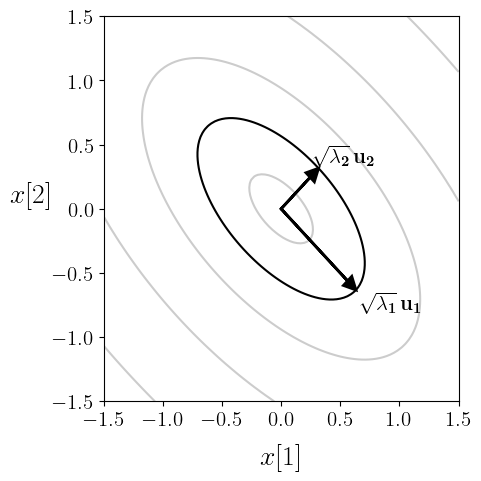

In [5]:
fig = plt.figure(figsize = (5,5)) 
ax1 = plt.axes()
ax1.arrow(0, 0, invsq2*np.sqrt(eigs[0]), invsq2*np.sqrt(eigs[0]), head_width=0.1, 
         head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
ax1.arrow(0, 0, invsq2*np.sqrt(eigs[1]), -invsq2*np.sqrt(eigs[1]), head_width=0.1, 
         head_length=0.1, fc='black', ec='black',length_includes_head=True,lw=2)
ax1.text(invsq2*np.sqrt(eigs[0])-0.05, invsq2*np.sqrt(eigs[0])+0.05,r'$\mathbf{\sqrt{\lambda_2}\,u_2}$',
        fontsize=font_size_ticks)
ax1.text(invsq2*np.sqrt(eigs[1])+0.03, -invsq2*np.sqrt(eigs[1])-0.15,r'$\mathbf{\sqrt{\lambda_1}\,u_1}$',
        fontsize=font_size_ticks)
CS = plt.contour(X, Y, Z, levels = level_list,colors='black',alpha=1)
CS2 = plt.contour(X, Y, Z, levels = level_list_2,colors='black',alpha=0.2)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel(r"$x[1]$", fontsize=font_size,labelpad=10)
h = plt.ylabel(r"$x[2]$", fontsize=font_size,labelpad=15)
h.set_rotation(0)
plt.gcf().subplots_adjust(left=0.19)